In [1]:
import plotly.graph_objs as go
import numpy as np
import torch
from thesis.utils import *
from thesis.nets import *
import random
from _plotly_utils.colors.qualitative import D3 as colors

In [2]:
import plotly.io as pio
import plotly.graph_objs as go
pio.templates.default = "simple_white"
template = "simple_white"

In [3]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0.1)",
        bordercolor="black",
        borderwidth=1
    )
)

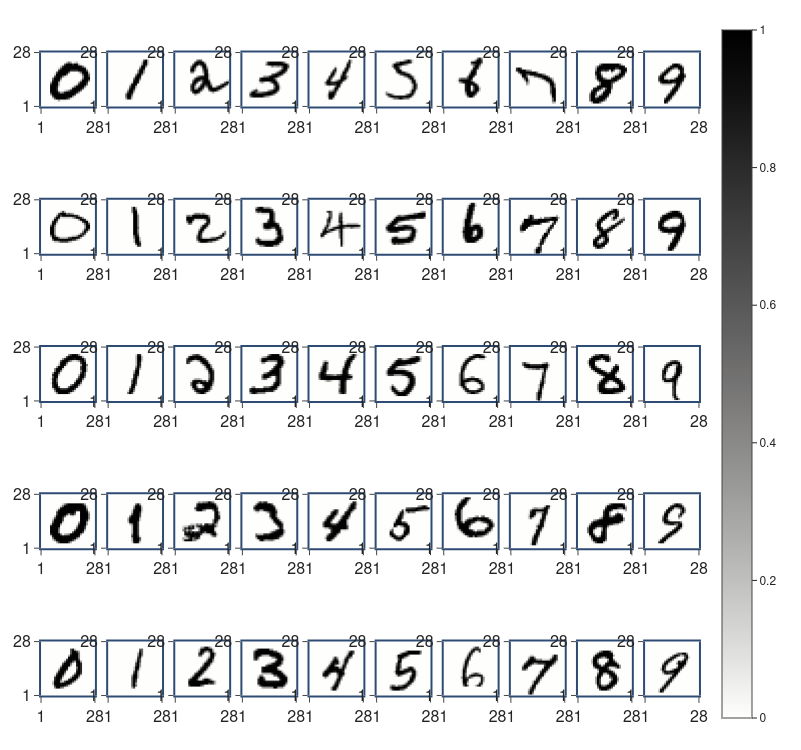

In [5]:
from torchvision.datasets import MNIST
from torchvision import transforms
dataset = MNIST(root='torchMNIST', download=False,
               transform=transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.Lambda(lambda x: x * 1),
                ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
import plotly
fig = plotly.subplots.make_subplots(rows=5, cols=10,
                                   vertical_spacing=0.04, horizontal_spacing=0.02)
fig.update_layout(template=template)
for row in range(1, 6):
    for col in range(1, 11):
        batch = next(iter(dataloader))
        while batch[1].item() != col - 1:
            batch = next(iter(dataloader))
        fig.add_heatmap(
            x=list(range(24)), y=list(range(25)),
            z=batch[0].squeeze(0).squeeze(0).flip(0), coloraxis='coloraxis',
            row=row, col=col
        )
        fig.update_xaxes(mirror=True, linewidth=2, row=row, col=col, zeroline=False,
                         linecolor='#2e4b73', tickvals=[0, 27], ticktext=['1', '28'], range=[0, 27], scaleanchor='x', scaleratio=1, constrain="domain",
                        tickfont_size=16)
        fig.update_yaxes(mirror=True, linewidth=2, row=row, col=col, zeroline=False,
                         linecolor='#2e4b73', tickvals=[0, 27], ticktext=['1', '28'], range=[0, 27], scaleanchor='x', scaleratio=1, constrain="domain",
                        tickfont_size=16)
# fig.update_layout(layout)
fig.update_layout(height=750, width=1500, coloraxis_colorscale='gray_r',
                 margin=dict(
                 t=20, l=20, b=20, r=20))

In [5]:
fig.write_image('misc//MNIST.pdf')
fig.write_image('misc//MNIST.svg')

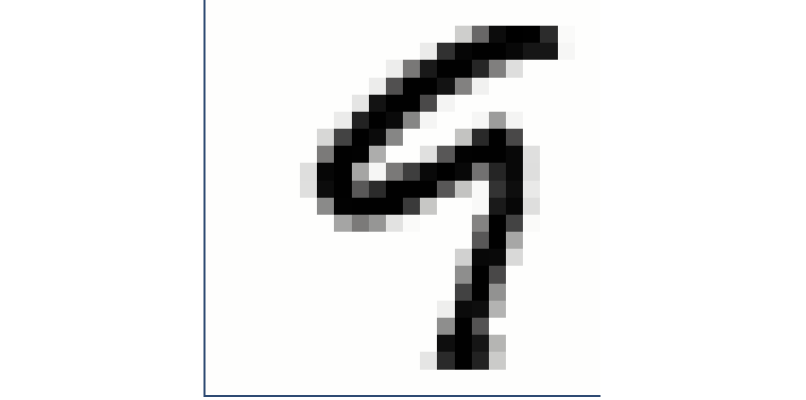

In [6]:
fig = go.Figure(layout=layout)
fig.add_heatmap(
    x=list(range(24)), y=list(range(25)),
    z=batch[0].squeeze(0).squeeze(0).flip(0), coloraxis='coloraxis',
)
fig.update_xaxes(mirror=False, linewidth=2, zeroline=False, linecolor='#2e4b73', tickvals=[], ticktext=[], range=[0, 23], scaleanchor='x', scaleratio=1, constrain="domain")
fig.update_yaxes(mirror=False, linewidth=2, zeroline=False, linecolor='#2e4b73', tickvals=[], ticktext=[], range=[0, 23], scaleanchor='x', scaleratio=1, constrain="domain")
fig.update_layout(height=400, width=400, coloraxis_colorscale='gray_r', coloraxis_showscale=False,
                 margin=dict(
                 t=0, l=0, b=0, r=0))
fig.update_layout(template=template)

In [7]:
fig.write_image('misc//MNIST_digit.pdf')
fig.write_image('misc//MNIST_digit.svg')

In [8]:
t_neg = np.linspace(-100, 0, 100)
t_pos = np.linspace(0, 100, 100)
dw_neg = -0.3 * np.exp(t_neg / 8)
dw_pos = np.exp(- t_pos / 20)

In [9]:
fig = go.Figure(layout=layout)
fig.update_layout(layout, template=template)
fig.add_scatter(x=t_neg, y=dw_neg,
                name='Негативное обновление', line_shape='spline')
fig.add_scatter(x=t_pos, y=dw_pos,
                name='Позитивное обновление', line_shape='spline')
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} с}$'
fig.layout.yaxis.title.text = '$\large{\Delta w}$'
fig.layout.legend.y = 1
fig.layout.legend.x = 0
fig.layout.margin.t = 20
fig.layout.margin.b = 80
fig.layout.margin.r = 20

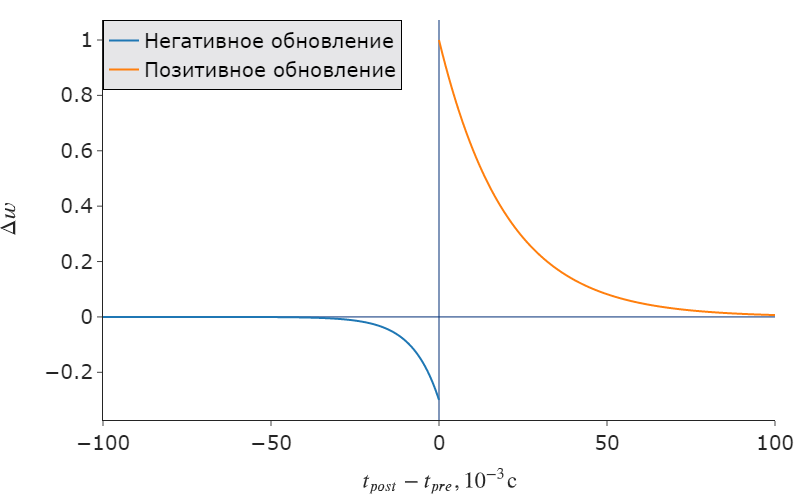

In [10]:
fig

In [11]:
fig.write_image('misc//STDP_ru.pdf')
fig.write_image('misc//STDP_ru.svg')

fig.data[0].name = 'negative update'
fig.data[1].name = 'positive update'
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} s}$'
fig.write_image('misc//STDP_eng.pdf')
fig.write_image('misc//STDP_eng.svg')

In [12]:
fig = go.Figure(layout=layout)
fig.update_layout(layout)
fig.add_scatter(x=t_neg, y=-dw_neg,
                name='Негативное обновление', line_shape='spline')
fig.add_scatter(x=t_pos, y=-dw_pos,
                name='Позитивное обновление', line_shape='spline')
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} с}$'
fig.layout.yaxis.title.text = '$\large{\Delta w}$'

fig.layout.legend.y = 1
fig.layout.legend.x = 0
fig.layout.margin.t = 20
fig.layout.margin.b = 20
fig.layout.margin.r = 20

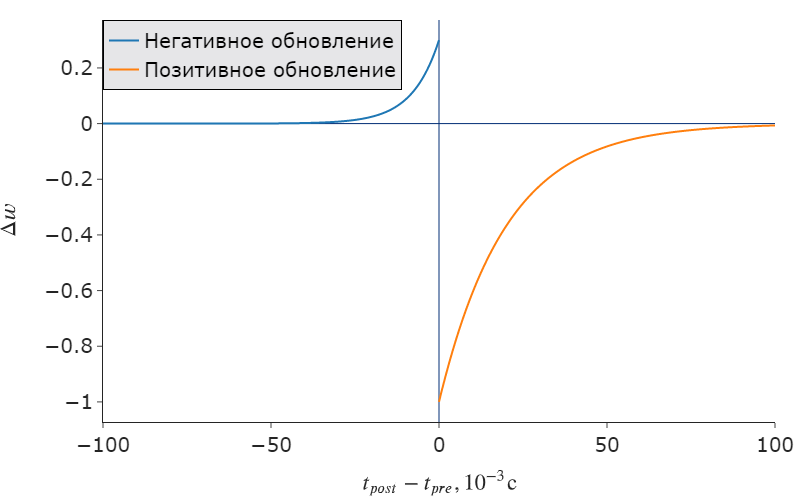

In [13]:
fig

In [14]:
fig.write_image('misc//anti-STDP_ru.pdf')
fig.write_image('misc//anti-STDP_ru.svg')

fig.data[0].name = 'negative update'
fig.data[1].name = 'positive update'
fig.layout.xaxis.title.text = '$\large{t_{post} - t_{pre}, 10^{-3} s}$'

fig.write_image('misc//anti-STDP_eng.pdf')
fig.write_image('misc//anti-STDP_eng.svg')

In [15]:
fig = torch.load('misc//LC_SNN-learning-curve.pt')

In [16]:
fig.update_layout(layout, template=template)
fig.update_layout(width=1200, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.7
fig.layout.margin.t = 40
fig.layout.margin.b = 20
fig.layout.margin.r = 20
fig.layout.margin.l = 60
fig.data = [fig.data[0], fig.data[1], fig.data[3], fig.data[2]]
for i in range(4):
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
    fig.data[i].line.color = colors[i]
fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]

In [17]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.5575750383207867, 1.2719709116170854,
                   …

In [18]:

fig.write_image('misc//LCSNN_learning_rate.pdf', height=500, width=1200)
fig.write_image('misc//LCSNN_learning_rate.svg', height=500, width=1200)

fig.layout.legend.x = 0.7
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.data[3].name = 'отбор по спайкам'
fig.write_image('misc//LCSNN_learning_rate_ru.pdf', height=500, width=1200)
fig.write_image('misc//LCSNN_learning_rate_ru.svg', height=500, width=1200)

In [19]:
fig = torch.load('misc//C_SNN-learning-curve.pt')

In [20]:
fig.update_layout(layout, template=template)
fig.update_layout(width=1200, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.7
fig.layout.margin.t = 40
fig.layout.margin.b = 20
fig.layout.margin.r = 20
fig.layout.margin.l = 60
for i in range(3):
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
    fig.data[i].line.color = colors[i]
fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]

In [21]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.5732132722552274, 1.4349216006458332,
                   …

In [22]:
fig.write_image('misc//CSNN_learning_rate.pdf', height=500, width=1200)
fig.write_image('misc//CSNN_learning_rate.svg', height=500, width=1200)

fig.layout.legend.x = 0.7
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.write_image('misc//CSNN_learning_rate_ru.pdf', height=500, width=1200)
fig.write_image('misc//CSNN_learning_rate_ru.svg', height=500, width=1200)

In [23]:
fig = torch.load('misc//FC_SNN-learning-curve.pt')

In [24]:
fig.update_layout(layout, template=template)
fig.update_layout(width=1200, height=500)
fig.layout.yaxis.title.text = 'Accuracy, %'
fig.layout.legend.y = 0.1
fig.layout.legend.x = 0.7
fig.layout.margin.t = 40
fig.layout.margin.b = 20
fig.layout.margin.r = 20
fig.layout.margin.l = 60
for i in range(3):
    fig.data[i].line.color = colors[i]
    fig.data[i].y = [item * 100 for item in fig.data[i].y]
    fig.data[i].error_y.array = [item * 100 for item in fig.data[i].error_y.array]
fig.layout.xaxis.tickformat = '1'
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.range = [20, 100]
fig.layout.xaxis.range = [0, 12000]
fig.layout.yaxis.autorange = False
fig.layout.xaxis.autorange = False

In [25]:
fig

FigureWidget({
    'data': [{'error_y': {'array': [1.30566458173606, 1.4714312760030621,
                     …

In [26]:
fig.write_image('misc//FCSNN_learning_rate.pdf', height=500, width=1200)
fig.write_image('misc//FCSNN_learning_rate.svg', height=500, width=1200)

fig.layout.legend.x = 0.7
fig.layout.xaxis.title.text = 'Число итераций обучения'
fig.layout.yaxis.title.text = 'Точность, %'
fig.layout.yaxis.ticksuffix = ' '

fig.layout.title.text = ''
fig.data[0].name = 'голосование патчей'
fig.data[1].name = 'общее голосование'
fig.data[2].name = 'линейный классификатор'
fig.write_image('misc//FCSNN_learning_rate_ru.pdf', height=500, width=1200)
fig.write_image('misc//FCSNN_learning_rate_ru.svg', height=500, width=1200)

In [212]:
data = view_database()
data = data[data['network_type'] == 'LC_SNN']
data = data[data['n_filters'] == 100]
best_network = data.sort_values('accuracy', ascending=False)['name'].values[0]

In [213]:
net = load_network(best_network)

Created LC_SNN network 9b905a7666a70a6b2371ba1b68fa5436076b719c5bb80772e34403b3 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.32000000000000006, 'n_iter': 5000, 'c_w': -50.0, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



In [167]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY.pdf')
fig.write_image('misc//weights_XY.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_ru.pdf')
fig.write_image('misc//weights_XY_ru.svg')

In [6]:
data = view_database()
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
best_network = data.sort_values('accuracy', ascending=False)['name'].values[0]
net = load_network(best_network)

Created LC_SNN network 8f0d908db7571346ab8e257bf31fddb69bb8faccbb0574e2ee8db82b with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.32, 'n_iter': 5000, 'c_w': -50, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.3, 'A_neg': -3, 'tau_pos': 8.0, 'tau_neg': 20.0, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [7]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '0ee09799-c261-4d6e-8591-79a9294e4da5',…

In [45]:
fig.write_image('misc//comp_distr.pdf')
fig.write_image('misc//comp_distr.svg')

In [46]:
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'
fig.layout.title.text = ''
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '6eab55ed-b70d-46ff-9731-dc7ffdf291fc',…

In [47]:
fig.write_image('misc//comp_distr_ru.pdf')
fig.write_image('misc//comp_distr_ru.svg')

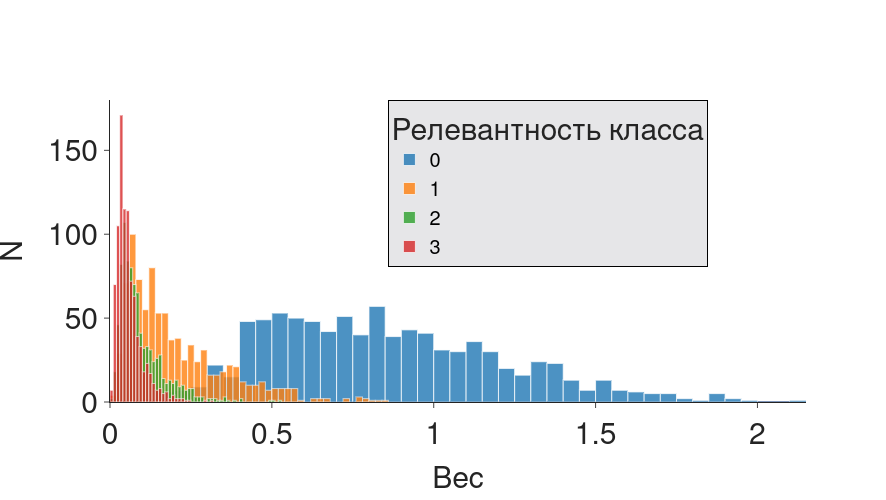

In [26]:
votes_sorted = net.votes.view(10, -1).sort(0, descending=True).values

from matplotlib import pyplot as plt


fig = go.Figure()
# fig.update_layout(layout, template=template)
for i in range(4):
    # create the histogram
#     (n, bins, patches) = plt.hist(votes_sorted[i, :], bins=20, label='hst')
#     fig.add_scatter(x=bins, y=n)
    fig.add_trace(go.Histogram(x=votes_sorted[i, :], opacity=0.8, name=f"{i}"))
fig.update_layout(layout, template=template, barmode='overlay', legend_title_text="Релевантность класса",
                  legend_title_font_size=30,
                  legend_x=0.4,
                  xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30,  yaxis_tickfont_size=30, 
#                   xaxis_ticktext_font_size=30,
                 xaxis_title_text="Вес", yaxis_title_text="N")

In [27]:
fig.write_image('misc//votes_distr_4_ru.pdf')
fig.write_image('misc//votes_distr_4_ru.svg')

In [48]:
w, fig = net.accuracy_distribution()
fig.layout.xaxis.range = [0, 9.5]
fig.layout.yaxis.range = [0.7, 1]
fig.update_layout(layout, template=template)
fig.layout.xaxis.zeroline = False
fig.layout.yaxis.zeroline = False

In [49]:
fig

FigureWidget({
    'data': [{'error_y': {'array': array([0.00351738, 0.00477236, 0.01007173, 0.01018094, 0.011…

In [50]:
fig.write_image('misc//acc_distr.pdf')
fig.write_image('misc//acc_distr.svg')

In [51]:
fig.layout.xaxis.title.text = 'Метка'
fig.layout.yaxis.title.text = 'Точность'
fig.layout.title.text = ''

In [52]:
fig.write_image('misc//acc_distr_ru.pdf')
fig.write_image('misc//acc_distr_ru.svg')

In [53]:
fig = net.votes_distribution()
fig.update_layout(layout, template=template)
fig.layout.yaxis.zeroline = False
fig.layout.xaxis.zeroline = False

In [54]:
fig

FigureWidget({
    'data': [{'error_y': {'array': array([1.2934201 , 0.65735716, 0.42495543, 0.25497413, 0.235…

In [55]:
fig.write_image('misc//votes_distr.pdf')
fig.write_image('misc//votes_distr.svg')

In [56]:
fig.layout.xaxis.title.text = 'Значимость класса'
fig.layout.yaxis.title.text = 'Средний голос'
fig.layout.title.text = ''

In [57]:
fig.write_image('misc//votes_distr_ru.pdf')
fig.write_image('misc//votes_distr_ru.svg')

In [58]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
net = load_network(data.sort_values('accuracy').iloc[-1]['name'])

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [59]:
fig = net.plot_votes()
fig.update_layout(layout, template=template)
fig.data[0].colorbar.title.font.size = 20
fig.data[0].colorbar.tickfont.size = 20
fig.layout.margin.l = 30
fig.layout.margin.t = 40
fig.layout.margin.b = 40
fig.layout.margin.r = 0
fig.layout.height = 300
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 20}, 'title': {'font': {'size': 20}, 'text': 'V…

In [60]:
fig.write_image('misc//votes.pdf')
fig.write_image('misc//votes.svg')

In [61]:
fig.layout.xaxis.title.text = 'Индекс Y нейрона'
fig.layout.yaxis.title.text = 'Метка класса'
fig.data[0].colorbar.title = 'Голос'
fig.data[0].colorbar.title.font.size = 20
fig.layout.title.text = ''

In [62]:
fig.write_image('misc//votes_ru.pdf')
fig.write_image('misc//votes_ru.svg')

In [63]:
fig = net.votes_distribution()
fig.update_layout(layout, template=template)
fig.layout.height = 250
fig.layout.yaxis.zeroline = False
fig

FigureWidget({
    'data': [{'error_y': {'array': array([2.2396517 , 1.2031698 , 0.75150585, 0.7565857 , 0.539…

In [64]:
fig.write_image('misc//votes_distribution.pdf')
fig.write_image('misc//votes_distribution.svg')

In [65]:
fig.layout.xaxis.title.text = 'Релевантость класса'
fig.layout.yaxis.title.text = 'Средний голос'
fig.layout.title.text = ''

In [66]:
fig.write_image('misc//votes_distribution_ru.pdf')
fig.write_image('misc//votes_distribution_ru.svg')

In [170]:
net = LC_SNN(n_filters=100)
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

Created LC_SNN network 3b63196bff0066ae049a8f6b309cd3b45870bd202b42295e4476e296 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.4, 'n_iter': 0, 'c_w': -100.0, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 100, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'W…

In [171]:
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [172]:
fig.write_image('misc//weights_XY_untrained.pdf')
fig.write_image('misc//weights_XY_untrained.svg')

In [173]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [174]:
fig.write_image('misc//weights_XY_untrained_ru.pdf')
fig.write_image('misc//weights_XY_untrained_ru.svg')

In [175]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['c_l'] == False]
data = data[data['mean_weight'] < 0.55]
data = data[data['c_w'] > -20]
data = data[data['network_type'] == 'LC_SNN']
name = data.sort_values('accuracy').iloc[0]['name']

In [176]:
net = load_network(name)
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

Created LC_SNN network 34e193d8b98d36929b5af9d4a3aa154e510f825ff780d94758cbcb2b with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.4, 'n_iter': 4000, 'c_w': -10, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': False, 'A_pos': None, 'A_neg': None, 'tau_pos': 20.0, 'tau_neg': 20.0, 'weight_decay': None, 'train_method': None, 'immutable_name': False}



In [177]:
fig.write_image('misc//weights_XY_bad.pdf')
fig.write_image('misc//weights_XY_bad.svg')

In [178]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [179]:
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [180]:
fig.write_image('misc//weights_XY_bad_ru.pdf')
fig.write_image('misc//weights_XY_bad_ru.svg')

In [181]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [182]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'W…

In [183]:
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [184]:
fig.write_image('misc//weights_XY_good.pdf')
fig.write_image('misc//weights_XY_good.svg')

In [185]:
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

In [186]:
fig.write_image('misc//weights_XY_good_ru.pdf')
fig.write_image('misc//weights_XY_good_ru.svg')

In [187]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)
max_comp = net.network.connections[('Y', 'Y')].w.min().item()

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [188]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.margin.t = 80
fig.layout.xaxis.range = [-700, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'e30b42cc-3c70-4df7-b329-5a74053e22c7',…

In [189]:
fig.write_image('misc//competition_distribution_best.pdf')
fig.write_image('misc//competition_distribution_best.svg')

In [190]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [191]:
fig.write_image('misc//competition_distribution_best_ru.pdf')
fig.write_image('misc//competition_distribution_best_ru.svg')

In [193]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text=""
                 )
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_best.pdf')
fig.write_image(f'misc//competition_on_XY_best.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_best_ru.pdf')
fig.write_image(f'misc//competition_on_XY_best_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [194]:
name = data.sort_values('accuracy', ascending=False).iloc[-1]['name']
net = load_network(name)

Created LC_SNN network weight_decay_pos-3e1e8fc7efa3b08377aad1964d7ece34d0eb7e734e2192f77e459a7d with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.47, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.5340670910619911, 'A_neg': -1.5153109003926835, 'tau_pos': 14.739958044130061, 'tau_neg': 14.154697593240293, 'weight_decay': -0.0009000000427477062, 'train_method': None, 'immutable_name': True}



In [195]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig.layout.xaxis.range = [-8, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'c856a9b8-5a46-4c98-917b-73e4f158247e',…

In [196]:
fig.write_image('misc//competition_distribution_worst.pdf')
fig.write_image('misc//competition_distribution_worst.svg')

In [197]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [198]:
fig.write_image('misc//competition_distribution_worst_ru.pdf')
fig.write_image('misc//competition_distribution_worst_ru.svg')

In [199]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text=""
                 )
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_worst.pdf')
fig.write_image(f'misc//competition_on_XY_worst.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_worst_ru.pdf')
fig.write_image(f'misc//competition_on_XY_worst_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [200]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
data = data[data['accuracy'] < 0.7]
data = data[data['accuracy'] > 0.5]
name = data.sort_values('accuracy', ascending=False).iloc[len(data)//2]['name']
net = load_network(name)

Created LC_SNN network 66404d1b316e2594d9f9ec8647b3ff3fbffd10228f24802a111022b1 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -1.9008609641777172, 'A_neg': -1.5871087635095806, 'tau_pos': 17.57689766888219, 'tau_neg': 24.475381830304222, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [201]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30

fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '10eff696-2f77-4b13-b0ab-e1464b928e5e',…

In [202]:
fig.write_image('misc//competition_distribution_medium_good.pdf')
fig.write_image('misc//competition_distribution_medium_good.svg')

In [203]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [204]:
fig.write_image('misc//competition_distribution_medium_good_ru.pdf')
fig.write_image('misc//competition_distribution_medium_good_ru.svg')

In [205]:
fig = net.draw_competitions(12, max_comp)
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_good.pdf')
fig.write_image(f'misc//competition_on_XY_medium_good.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_good_ru.pdf')
fig.write_image(f'misc//competition_on_XY_medium_good_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [206]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
data = data[data['accuracy'] < 0.5]
data = data[data['accuracy'] > 0.3]
name = data.sort_values('accuracy', ascending=False).iloc[len(data)//2]['name']
net = load_network(name)

Created LC_SNN network 3664d4dfe29edf6af64a96445f188d98b7f745c2aa9d83c73b45b3e0 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -1.2326585379137385, 'A_neg': -0.5819412528943878, 'tau_pos': 5.39817965549843, 'tau_neg': 15.14567319548371, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [207]:
w, fig = net.competition_distribution()
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '12045526-bab2-4c9b-9e07-00b230f489e4',…

In [208]:
fig.write_image('misc//competition_distribution_medium_bad.pdf')
fig.write_image('misc//competition_distribution_medium_bad.svg')

In [209]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [210]:
fig.write_image('misc//competition_distribution_medium_bad_ru.pdf')
fig.write_image('misc//competition_distribution_medium_bad_ru.svg')

In [211]:
fig = net.draw_competitions(12, max_comp)
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")
fig.write_image(f'misc//competition_on_XY_medium_bad.pdf')
fig.write_image(f'misc//competition_on_XY_medium_bad.svg')
fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title.text = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.write_image(f'misc//competition_on_XY_medium_bad_ru.pdf')
fig.write_image(f'misc//competition_on_XY_medium_bad_ru.svg')
fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [60]:
from bindsnet.network import Network
from bindsnet.network.topology import Connection, LocalConnection
from bindsnet.network.nodes import McCullochPitts, IFNodes, LIFNodes, AdaptiveLIFNodes, Input

In [61]:
network = Network(learning=True)

In [62]:
n_input = 20 * 20
conv_size = int((20 - 12 + 2 * 0) / 2) + 1
n_filters = 25
n_output = n_filters * conv_size * conv_size 
output_shape = int(np.sqrt(n_output))
time_max = 250
thresh = -50
rest = -60
reset = -65
tc_decay = 100.
theta_decay = 100.
theta_plus = 5
refrac = 10

In [63]:
input_layer = Input(n=20*20, shape=(1, 20, 20))
thresh_nodes = McCullochPitts(n=n_output, shape=(n_filters, conv_size, conv_size), rest=0, thresh=1)
if_nodes = IFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, thresh=thresh, refrac=refrac)
lif_nodes = LIFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, thresh=thresh, refrac=refrac, tc_decay=tc_decay)
alif_nodes = AdaptiveLIFNodes(n=n_output, shape=(n_filters, conv_size, conv_size), rest=rest, reset=reset, tc_decay=tc_decay, thresh=thresh, refrac=refrac,
                              theta_plus=theta_plus, tc_theta_decay=theta_decay, learning=True)

In [64]:
thresh_connection = LocalConnection(input_layer, thresh_nodes, n_filters=25, kernel_size=12, stride=2,
                                   )
if_connection = LocalConnection(input_layer, if_nodes, n_filters=25, kernel_size=12, stride=2,
                               )
lif_connection = LocalConnection(input_layer, lif_nodes, n_filters=25, kernel_size=12, stride=2,
                                )
alif_connection = LocalConnection(input_layer, alif_nodes, n_filters=25, kernel_size=12, stride=2,
                                 )

In [65]:
network.add_layer(input_layer, name="input")
network.add_layer(thresh_nodes, name="thresh")
network.add_layer(if_nodes, name="if")
network.add_layer(lif_nodes, name="lif")
network.add_layer(alif_nodes, name="alif")

In [66]:
network.add_connection(thresh_connection, source='input', target='thresh')
network.add_connection(if_connection, source='input', target='if')
network.add_connection(lif_connection, source='input', target='lif')
network.add_connection(alif_connection, source='input', target='alif')

In [67]:
from bindsnet.network.monitors import Monitor

In [68]:
monitors = {}
for l in network.layers:
    if l == 'input':
        continue
    monitors[l] = Monitor(network.layers[l], state_vars=['s', 'v'], time=250)
    network.add_monitor(monitors[l], name=f'monitor_{l}')

In [69]:
from bindsnet.datasets import MNIST
from bindsnet.encoding import PoissonEncoder
from torchvision import transforms

In [70]:
encoded_dataset = MNIST(
    PoissonEncoder(time=250, dt=1),
    None,
    ".//MNIST",
    download=False,
    train=True,
    transform=transforms.Compose(
        [
            transforms.CenterCrop(20),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x * 30),
        ]
    ),
)
train_dataset = encoded_dataset
train_dataset.data = encoded_dataset.data[:10, :, :]

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=1, shuffle=True
)
train_iter = iter(train_dataloader)

In [71]:
batch = next(train_iter)

In [72]:
inpts = {'input': batch['encoded_image'].transpose(0, 1)}

In [73]:
network.reset_()
network.run(inpts=inpts, time=250)

In [154]:
def plot_activity(layer, index):
    v = (
        monitors[layer]
        .get("v")
        .squeeze(1)
        .view(time_max, -1)[:, index]
    )
    total_spikes = (
        monitors[layer].get("s").sum(0).squeeze(0).flatten()[index]
    )
    text = f"Total spikes: {total_spikes.item()}"
    spike_timings = (
        monitors[layer]
        .get("s")
        .squeeze(1)
        .view(time_max, -1)[:, index]
        .nonzero()
        .squeeze(1)
    ).long()
    title_text = f"Neuron {index} voltage<br>{text}"

    threshes = [thresh for i in range(250)]
    if layer == 'thresh':
        threshes = [1 for i in range(250)]
    if layer == 'alif':
        threshes = []
        theta = 0
        tc_theta_decay = torch.exp(
            -1 / torch.tensor(theta_decay)
        ).float().item()
        spikes = monitors[layer].get('s').squeeze(1).view(250, -1)[:, index]
        for s in spikes:
            theta *= tc_theta_decay
            if s:
                theta += theta_plus
            threshes.append(thresh + theta)
    v[spike_timings] = torch.tensor(threshes).float()[spike_timings - 1]
    subplot_voltage = go.Scatter(
        x=list(range(time_max)),
        y=v,
        line=dict(color=colors[0], width=1),
        mode="lines", line_shape='hv'
    )
    subplot_spikes = go.Scatter(
        x=spike_timings,
        y=torch.tensor(threshes)[spike_timings - 1],
        mode="markers",
        marker=dict(color=colors[1]),
    )

    fig = go.Figure()
    fig.update_layout(layout, template=template)
    fig.update_layout(
        legend_orientation='h', legend_font_size=18,
        title_text=title_text,
        xaxis_title_text="Time",
        yaxis_title_text="Voltage",
    )
    if layer == 'thresh':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[0, 0], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=[0, time_max], y=[1, 1], name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.layout.yaxis.zeroline = False

    elif layer == 'alif':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
        fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest],name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
    elif layer == 'lif':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=[0, time_max], y=[thresh, thresh], name = 'Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
        fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest], name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
    elif layer == 'if':
        fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                                 line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name='Activation threshhold',
                                 line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
        
    fig.add_trace(subplot_voltage)
    fig.data[-1].name = 'Voltage'
    fig.add_trace(subplot_spikes)
    fig.data[-1].name = 'Spikes'
   
    fig.layout.legend.y = -0.3
    fig.layout.legend.x = 0
    fig.layout.showlegend = True
    fig.layout.xaxis.zeroline = False
    fig.layout.yaxis.zeroline = False
    fig.update_layout(height=600, width=900)
    return fig

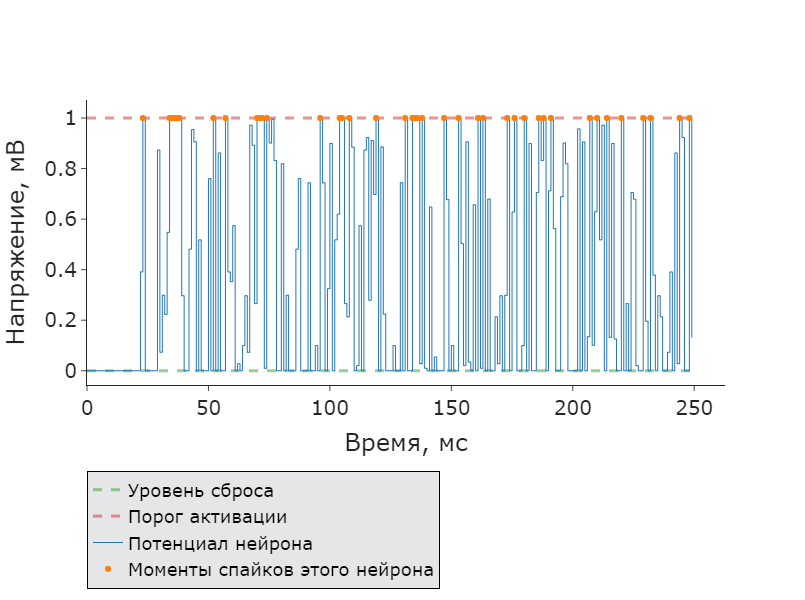

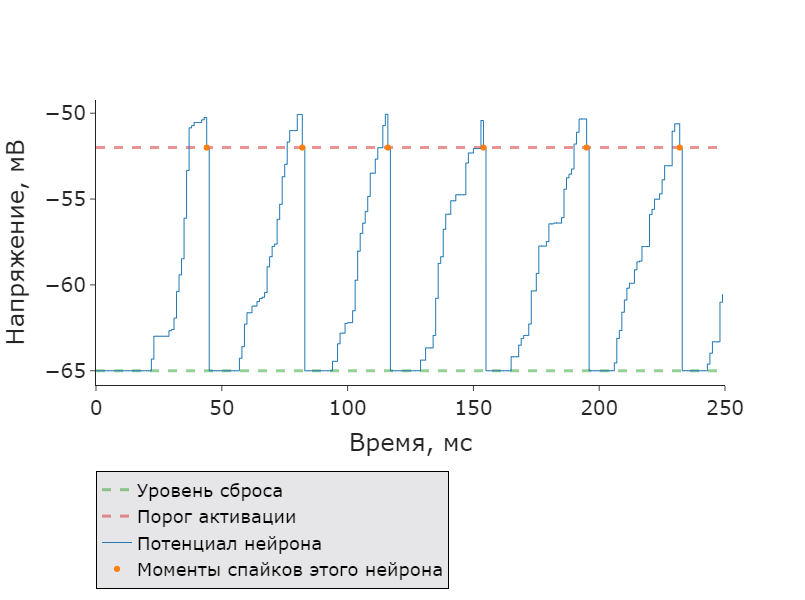

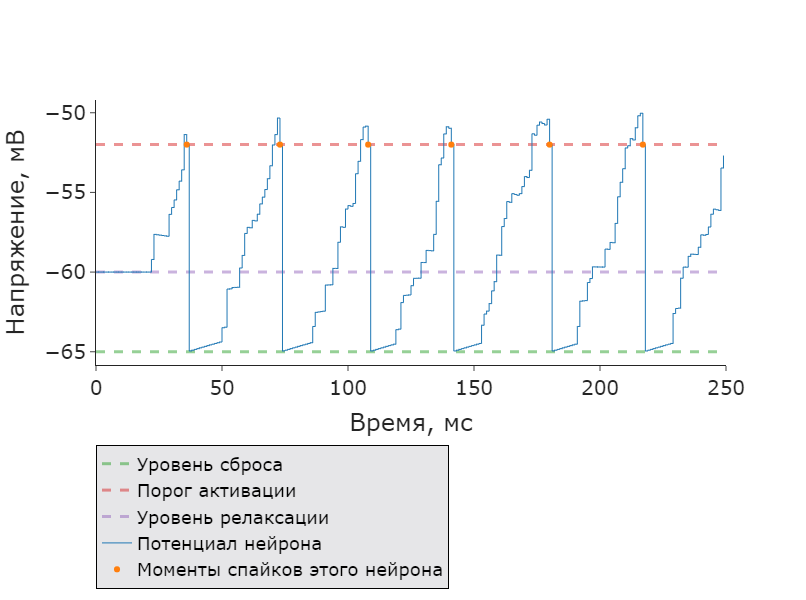

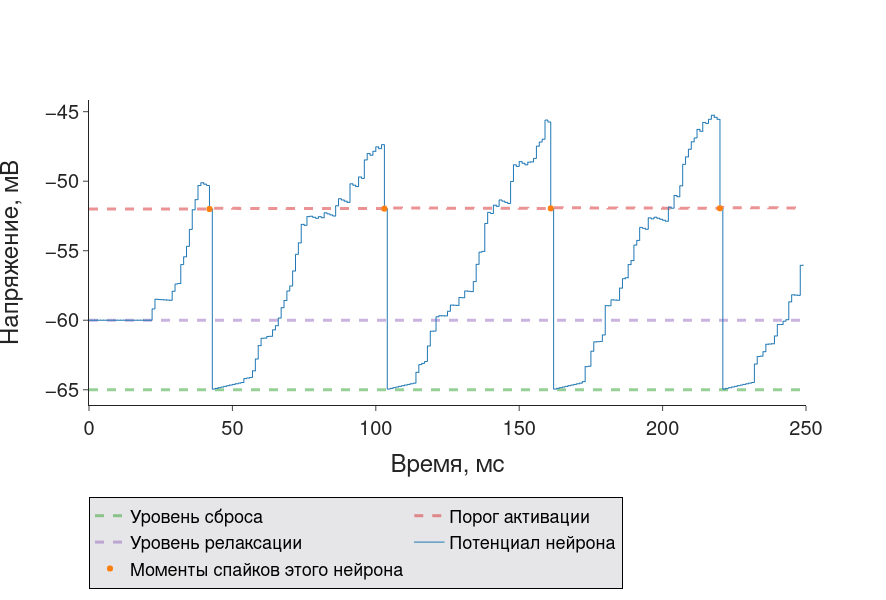

In [155]:
for layer in network.layers:
    if layer == 'input':
        continue
    fig = plot_activity(layer, 0)
    fig.layout.title.text = layer
    fig.write_image(f'misc//model_{layer}.pdf')
    fig.write_image(f'misc//model_{layer}.svg')
    
    fig.layout.title.text = ''
    fig.layout.xaxis.title.text = 'Время, мс'
    fig.layout.yaxis.title.text = 'Напряжение, мВ'
    fig.data[0].name = 'Уровень сброса'
    fig.data[1].name = 'Порог активации'
    fig.data[-1].name = 'Моменты спайков этого нейрона'
    fig.data[-2].name = 'Потенциал нейрона'
    if layer == 'alif' or layer == 'lif':
        fig.data[2].name = 'Уровень релаксации'
        
    fig.write_image(f'misc//model_{layer}_ru.pdf')
    fig.write_image(f'misc//model_{layer}_ru.svg')
    fig.show()

In [156]:
data = view_database()
data = data[data['n_filters'] == 25]
data = data[data['network_type'] == 'LC_SNN']
data = data[data['c_l'] == True]
name = data.sort_values('accuracy', ascending=False).iloc[0]['name']
net = load_network(name)
net.network.layers['Y'].rest = torch.tensor(-60.)
net.network.layers['Y'].refrac = torch.tensor(0.1)

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [157]:
net.feed_label(1)
reset = net.network.layers['Y'].reset
rest = net.network.layers['Y'].rest
thresh = net.network.layers['Y'].thresh
time_max = net.time_max
title_text = ''
index = net.best_voters.indices[0]
v = (
    net.voltages['Y']
    .get("v")
    .squeeze(1)
    .view(time_max, -1)[:, index]
)

spike_timings = (
    net.spikes['Y']
    .get("s")
    .squeeze(1)
    .view(time_max, -1)[:, index]
    .nonzero()
    .squeeze(1)
)

threshes = []
theta = 0
theta_plus = net.network.layers['Y'].theta_plus
tc_theta_decay = net.network.layers['Y'].tc_theta_decay

spikes = net.spikes['Y'].get('s').squeeze(1).view(250, -1)[:, index]

for s in spikes:
    theta *= tc_theta_decay
    if s:
        theta += theta_plus
    threshes.append(thresh + theta)
    
v[spike_timings] = torch.tensor(threshes)[spike_timings - 1]
subplot_voltage = go.Scatter(
    x=list(range(time_max)),
    y=v,
    line=dict(color=colors[0], width=1),
    mode="lines", line_shape='hv'
)

subplot_spikes = go.Scatter(
    x=spike_timings,
    y=torch.tensor(threshes)[spike_timings - 1],
    mode="markers",
    marker=dict(color=colors[1]),
)

fig = go.Figure()
fig.update_layout(layout, template=template)
fig.update_layout(
    legend_orientation='h', legend_font_size=18,
    title_text=title_text,
    xaxis_title_text="Time",
    yaxis_title_text="Voltage",
)

fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                         line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))



fig.add_trace(subplot_voltage)
fig.data[-1].name = 'Voltage'
fig.add_trace(subplot_spikes)
fig.data[-1].name = 'Spikes'

fig.layout.legend.y = -0.3
fig.layout.legend.x = 0
fig.layout.showlegend = True

Prediction: 1


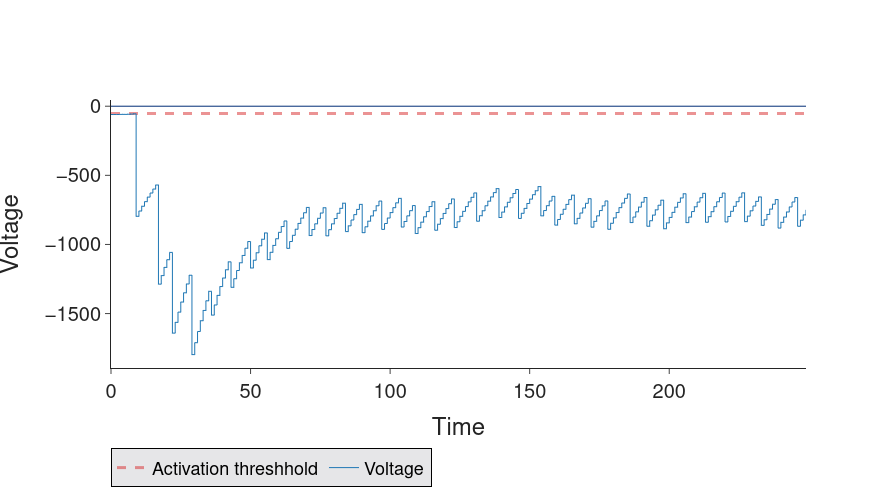

In [158]:
fig

In [159]:
fig.write_image('misc//bad_voltage.pdf')
fig.write_image('misc//bad_voltage.svg')

fig.layout.xaxis.title.text = 'Время, мс'
fig.layout.yaxis.title.text = 'Напряжение, мВ'
fig.data[0].name = 'Порог активации'
fig.data[-1].name = 'Моменты спайков нейрона'
fig.data[-2].name = 'Потенциал нейрона'

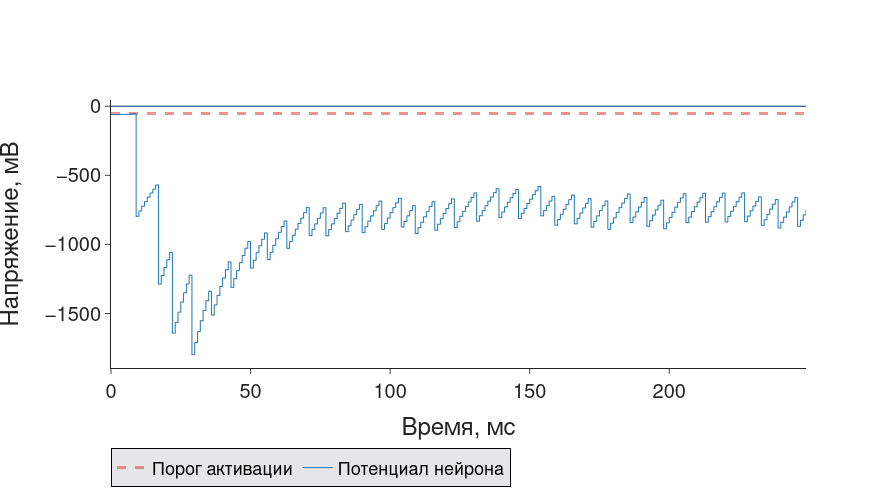

In [160]:
fig

In [161]:
fig.write_image(f'misc//bad_voltage_ru.pdf')
fig.write_image(f'misc//bad_voltage_ru.svg')

fig.write_image('misc//bad_voltage_ru.pdf')
fig.write_image('misc//bad_voltage_ru.svg')

In [162]:
reset = net.network.layers['Y'].reset
rest = net.network.layers['Y'].rest
thresh = net.network.layers['Y'].thresh
time_max = net.time_max
title_text = ''
index = net.best_voters.indices[0]
index = net.location_to_index([index, 0, 0])
v = (
    net.voltages['Y']
    .get("v")
    .squeeze(1)
    .view(time_max, -1)[:, index]
)

spike_timings = (
    net.spikes['Y']
    .get("s")
    .squeeze(1)
    .view(time_max, -1)[:, index]
    .nonzero()
    .squeeze(1)
)

threshes = []
theta = 0
tc_theta_decay = net.network.layers['Y'].theta_decay
theta_plus = net.network.layers['Y'].theta_plus
spikes = net.spikes['Y'].get('s').squeeze(1).view(250, -1)[:, index]

for s in spikes:
    theta *= tc_theta_decay
    if s:
        theta += theta_plus
    threshes.append(thresh + theta)
    
v[spike_timings] = torch.tensor(threshes)[spike_timings - 1]
subplot_voltage = go.Scatter(
    x=list(range(time_max)),
    y=v,
    line=dict(color=colors[0], width=1),
    mode="lines", line_shape='hv'
)

subplot_spikes = go.Scatter(
    x=spike_timings,
    y=torch.tensor(threshes)[spike_timings - 1],
    mode="markers",
    marker=dict(color=colors[1]),
)

fig = go.Figure()
fig.update_layout(layout, template=template)
fig.update_layout(
    legend_orientation='h', legend_font_size=18,
    title_text=title_text,
    xaxis_title_text="Time",
    yaxis_title_text="Voltage",
)
fig.add_trace(go.Scatter(x=[0, time_max], y=[reset, reset], name='Reset potential',
                         line=dict(color=colors[2], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
fig.add_trace(go.Scatter(x=list(range(250)), y=threshes, name = 'Activation threshhold',
                         line=dict(color=colors[3], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))
fig.add_trace(go.Scatter(x=[0, time_max], y=[rest, rest],name='Resting potential',
                                 line=dict(color=colors[4], width=3, dash='dash'), opacity=0.5, mode='lines', line_shape='hv'))


fig.add_trace(subplot_voltage)
fig.data[-1].name = 'Voltage'
fig.add_trace(subplot_spikes)
fig.data[-1].name = 'Spikes'

fig.layout.legend.y = -0.3
fig.layout.legend.x = 0
fig.layout.showlegend = True

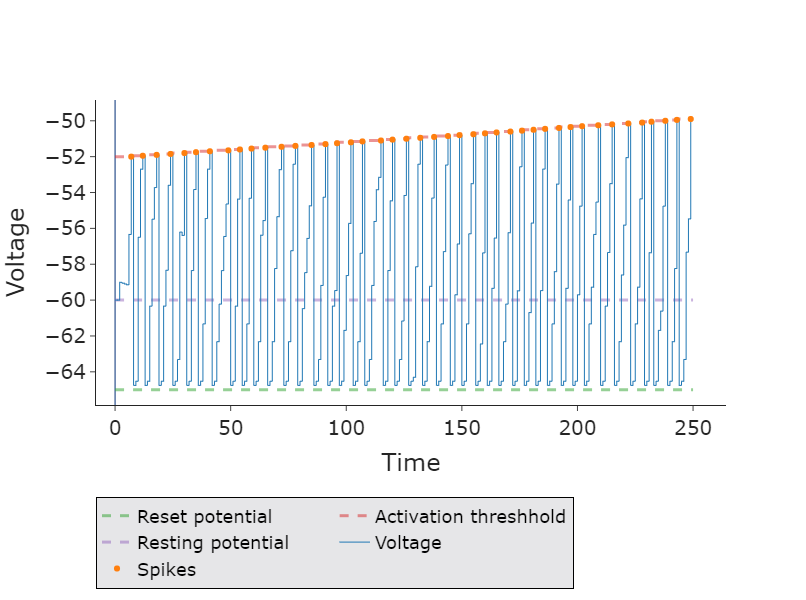

In [146]:
fig.update_layout(height=600, width=900)

In [147]:
fig.write_image('misc//bad_voltage.pdf')
fig.write_image('misc//bad_voltage.svg')

fig.layout.xaxis.title.text = 'Время, мс'
fig.layout.yaxis.title.text = 'Напряжение, мВ'
fig.data[0].name = 'Уровень сброса'
fig.data[1].name = 'Порог активации'
fig.data[2].name = 'Уровень релаксации'
fig.data[-1].name = 'Моменты спайков нейрона'
fig.data[-2].name = 'Потенциал нейрона'

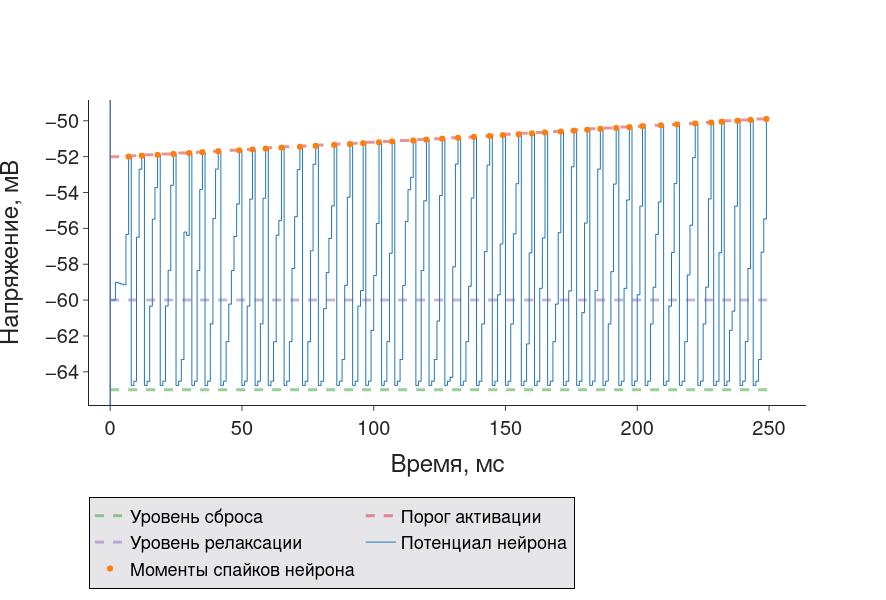

In [148]:
fig

In [149]:
fig.write_image(f'misc//good_voltage_ru.pdf')
fig.write_image(f'misc//good_voltage_ru.svg')

fig.write_image('misc//good_voltage_ru.pdf')
fig.write_image('misc//good_voltage_ru.svg')

In [139]:
data = view_database()
data = data[data['c_l'] == True]
data = data[data['n_filters'] == 25]
data = data.sort_values('accuracy', ascending=False)
name = data['name'].iloc[0]

In [140]:
net = load_network(name)

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [141]:
fig = net.competition_distribution()[1]

In [144]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {net.accuracy}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig.layout.xaxis.range = [-700, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'f8aef2aa-70ac-4fce-8699-d0ca90c612cd',…

In [145]:
fig.write_image('misc//competition_distribution_base.pdf')
fig.write_image('misc//competition_distribution_base.svg')

In [146]:
fig.layout.title.text = f'Точность: {net.accuracy}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [147]:
fig.write_image('misc//competition_distribution_base_ru.pdf')
fig.write_image('misc//competition_distribution_base_ru.svg')

In [27]:
data = view_database()
best_25_network = data[data["n_filters"] == 25].sort_values("accuracy", accuracy=False)["name"].iloc[0]
net = load_network(best_25_network)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [22]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_25_best.pdf')
fig.write_image('misc//weights_XY_25_best.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_25_best_ru.pdf')
fig.write_image('misc//weights_XY_25_best_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [6]:
fig = net.competition_distribution()[1]

In [7]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {round(net.accuracy - 0.134, 3)}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'b9dc099f-a7b7-43b1-88b2-fb8463c7b3cf',…

In [8]:
fig.write_image('misc//competition_distribution_clamp_low.pdf')
fig.write_image('misc//competition_distribution_clamp_low.svg')

In [9]:
fig.layout.title.text = f'Точность: {round(net.accuracy, 3)}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [10]:
fig.write_image('misc//competition_distribution_clamp_low_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_low_ru.svg')

In [19]:
net = load_network("25_clamp_low")

Created LC_SNN network 25_clamp_low with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -inf, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': True}



In [22]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_clamp_low.pdf')
fig.write_image('misc//weights_XY_clamp_low.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_clamp_low_ru.pdf')
fig.write_image('misc//weights_XY_clamp_low_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [6]:
fig = net.competition_distribution()[1]

In [7]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {round(net.accuracy - 0.134, 3)}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': 'b9dc099f-a7b7-43b1-88b2-fb8463c7b3cf',…

In [8]:
fig.write_image('misc//competition_distribution_clamp_low.pdf')
fig.write_image('misc//competition_distribution_clamp_low.svg')

In [9]:
fig.layout.title.text = f'Точность: {round(net.accuracy, 3)}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [10]:
fig.write_image('misc//competition_distribution_clamp_low_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_low_ru.svg')

In [23]:
net = load_network("25_clamp_high")

Created LC_SNN network 25_clamp_high with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 5000, 'c_w': -100, 'c_w_min': -350, 'c_w_max': 0, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': True}



In [24]:
fig = net.plot_weights_XY()
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30
fig.update_layout(layout, template=template)
fig.update_layout(height=700, width=775, xaxis_zeroline=False, yaxis_zeroline=False,
                  xaxis_showticklabels=False, yaxis_showticklabels=False,
                  xaxis_title_text="", yaxis_title_text="")

fig.write_image('misc//weights_XY_clamp_high.pdf')
fig.write_image('misc//weights_XY_clamp_high.svg')

fig.layout.title.text = ''
fig.layout.xaxis.title.text = ''
fig.layout.yaxis.title.text = ''
fig.data[0].colorbar.title = 'Вес'
fig.data[0].colorbar.title.font.size = 30
fig.data[0].colorbar.tickfont.size = 30

fig.write_image('misc//weights_XY_clamp_high_ru.pdf')
fig.write_image('misc//weights_XY_clamp_high_ru.svg')

fig

FigureWidget({
    'data': [{'colorbar': {'tickfont': {'size': 30}, 'title': {'font': {'size': 30}, 'text': 'В…

In [13]:
fig = net.competition_distribution()[1]

In [14]:
fig.update_layout(layout, template=template)
fig.update_layout(xaxis_zeroline=False, yaxis_zeroline=False,
                 xaxis_title_font_size=30, yaxis_title_font_size=30,
                  xaxis_tickfont_size=30, yaxis_tickfont_size=30)
fig.layout.title.text = fig.layout.title.text + f'<br>Accuracy: {round(net.accuracy, 3)}'
fig.layout.margin.t = 80
fig.layout.title.font.size = 30
# fig.layout.xaxis.range = [-, 0]
fig

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '5508e2cc-b401-4f82-99f0-42ab357a432a',…

In [15]:
fig.write_image('misc//competition_distribution_clamp_high.pdf')
fig.write_image('misc//competition_distribution_clamp_high.svg')

In [16]:
fig.layout.title.text = f'Точность: {round(net.accuracy, 3)}'
fig.layout.title.font.size = 30
fig.layout.xaxis.title.text = 'Вес конкуренции'
fig.layout.yaxis.title.text = 'N'

In [17]:
fig.write_image('misc//competition_distribution_clamp_high_ru.pdf')
fig.write_image('misc//competition_distribution_clamp_high_ru.svg')

In [162]:
net = load_network(name)

Created LC_SNN network a00fb88cd2a9fb0a62c55afda5e2e30a376f5ae7b6338df6c91bf7b4 with parameters
{'network_type': 'LC_SNN', 'mean_weight': 0.46, 'n_iter': 4000, 'c_w': -100, 'c_w_min': -inf, 'time_max': 250, 'crop': 20, 'kernel_size': 12, 'kernel_prod': 144, 'stride': 4, 'n_filters': 25, 'intensity': 127.5, 'dt': 1, 'c_l': True, 'A_pos': -0.05557006922455341, 'A_neg': -1.6260407487677235, 'tau_pos': 17.720578799356897, 'tau_neg': 16.475865309906567, 'weight_decay': 0, 'train_method': None, 'immutable_name': False}



In [141]:
net.feed_label(4)
fig = net.plot_spikes_Y()

Prediction: 4


In [142]:
fig.update_layout(yaxis_ticktext=[], yaxis_title_text='')

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(255,255,229)'], [0.125,
                             'r…

In [143]:
net.calculate_accuracy(10000, all=True)

Accuracy with patch_voting: 0.7473 with std 0.004
Accuracy with all_voting: 0.7517 with std 0.004
Accuracy with spikes_first: 0.7487 with std 0.004


AttributeError: 'NoneType' object has no attribute 'predict'

In [151]:
data = view_database()

In [152]:
data = data[data['network_type'] == "LC_SNN"]
data = data[data["c_l"] == False]
data = data[data["n_filters"] == 100]
data = data.sort_values("accuracy", ascending=False)

In [153]:
data

name network_type accuracy  \
240  9b905a7666a70a6b2371ba1b68fa5436076b719c5bb807...       LC_SNN    0.896   
74   340f370a156cc1793a14d57cc51b57ecf1a52cedd22279...       LC_SNN    0.894   
135  52e530c4c9278115dd806da9800c00dabaaff9dda299a1...       LC_SNN     0.89   
294  bee989653b344d28d87e0b2c9691dffcb9b4f7c53144b1...       LC_SNN     0.89   
27   106e5cd7c0ab7dae45103a8d252eb08330117803294a59...       LC_SNN    0.888   
..                                                 ...          ...      ...   
291  bb5a2ce1b4cabeeb1b357cd2b1da21fdb993c989660449...       LC_SNN    0.706   
17   0aee3e34068a41e787bf20c52bcda94065c89a292ea92d...       LC_SNN   0.7052   
22   0e1a758300da67ea00cbb1695be3891cc26af7b4f50926...       LC_SNN   0.6972   
279  b3d25a87b31119846184cff3afe953d5790c73d79d4fcf...       LC_SNN    0.686   
129  4d9f9bd82c62bf9aa4838dd2e3bc616c916a01f02015ef...       LC_SNN     None   

          error  n_iter  n_filters  kernel_size  stride  c_l  tau_pos  ...  \
240        None  5000.0      100.0         12.0     4.0  0.0     20.0  ...   
74   0.00973468  4000.0      100.0         12.0     4.0  0.0     20.0  ...   
135  0.00989444  4000.0      100.0         12.0     4.0  0.0     20.0  ...   
294  0.00989444  4000.0      100.0         12.0     4.0  0.0     20.0  ...   
27   0.00997276  4000.0      100.0         12.0     4.0  0.0     20.0  ...   
..          ...     ...        ...          ...     ...  ...      ...  ...   
291  0.00656375  5000.0      100.0          8.0     4.0  0.0      8.0  ...   
17   0.00657415  5000.0      100.0          8.0     4.0  0.0      8.0  ...   
22   0.00667595  5000.0      100.0          8.0     4.0  0.0      8.0  ...   
279  0.00681167  5000.0      100.0          8.0     4.0  0.0      8.0  ...   
129        None     0.0      100.0         12.0     4.0  0.0     20.0  ...   

     weight_decay mean_weight    c_w c_w_min  crop  time_max  intensity   dt  \
240             0        0.32  -50.0    -inf  20.0     250.0      127.5  1.0   
74              0        0.30 -100.0    -inf  20.0     250.0      127.5  1.0   
135             0        0.35  -80.0    -inf  20.0     250.0      127.5  1.0   
294             0        0.30 -140.0    -inf  20.0     250.0      127.5  1.0   
27              0        0.40 -120.0    -inf  20.0     250.0      127.5  1.0   
..            ...         ...    ...     ...   ...       ...        ...  ...   
291             0        0.50  -80.0    -inf  20.0     250.0      127.5  1.0   
17              0        0.50 -120.0    -inf  20.0     250.0      127.5  1.0   
22              0        0.30  -80.0    -inf  20.0     250.0      127.5  1.0   
279             0        0.40 -100.0    -inf  20.0     250.0      127.5  1.0   
129             0        0.60 -130.0    -inf  20.0     250.0      127.5  1.0   

     train_method  accuracy_method  
240         basic     patch_voting  
74          basic       all_voting  
135         basic     spikes_first  
294         basic     patch_voting  
27          basic     spikes_first  
..            ...              ...  
291         basic     patch_voting  
17          basic     patch_voting  
22          basic     patch_voting  
279         basic     patch_voting  
129          None     patch_voting  

[76 rows x 23 columns]